<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Medical Insurance Cost Prediction model</h1>
</div>

## Inputs

In [1]:
# Input file name with path
input_file_name = 'car data.csv'

# Target class name
input_target_class = "Present_Price"

# Columns to be removed
#input_drop_col = "sex"

# Col datatype selection
input_datatype_selection = 'auto'

# Categorical columns
#input_cat_columns = ['sex', 'smoker', 'region']

# Numerical columns
#input_num_columns = ['age', 'bmi', 'children','charges']

# Encoding technique
input_encoding = 'LabelEncoder'

# Handle missing value
input_treat_missing_value = 'drop'

# Machine learning algorithm
input_ml_algo = 'RandomForestRegressor'

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

### 1.1. Import Libraries

In [18]:
# Import libraries

# Data Manipulation
import numpy as np
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.model_selection import train_test_split, GridSearchCV
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

# Maths
import math

# Set the options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Load the datasets


In [7]:
# Read data in form of a csv file
df = pd.read_csv(input_file_name)

# First 5 rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

### 2.1. Descriptive Statistics


In [8]:
# Dimension of the data
df.shape

(301, 9)

In [9]:
# Summary of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### 2.2 Missing Values


In [10]:
# Missing values for every column
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

### 3.1. Extract data types of columns

In [12]:
# Remove extra columns
#col_remove = input_drop_col
#df = df.drop(col_remove, axis = 1)

In [13]:
# Get the list of numeric and categorical columns according to the input
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)

else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)

    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  ['Seller_Type', 'Transmission']
Categorical Columns :  ['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
Numerical Columns :  ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


### 3.2 Check distribution of target class

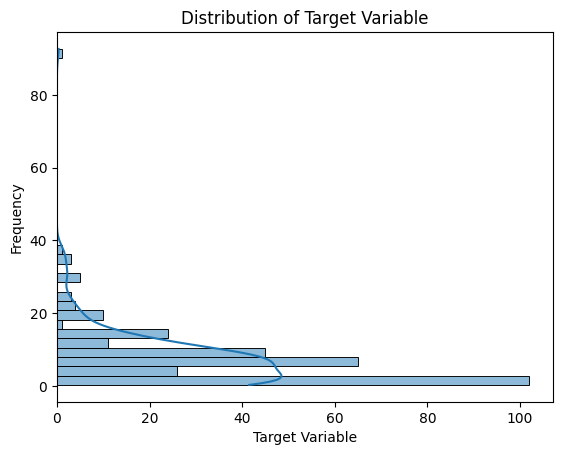

In [14]:
# Assuming 'y' is your target variable
sns.histplot(y=df[input_target_class], kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

### 3.3. Check the distribution of every feature

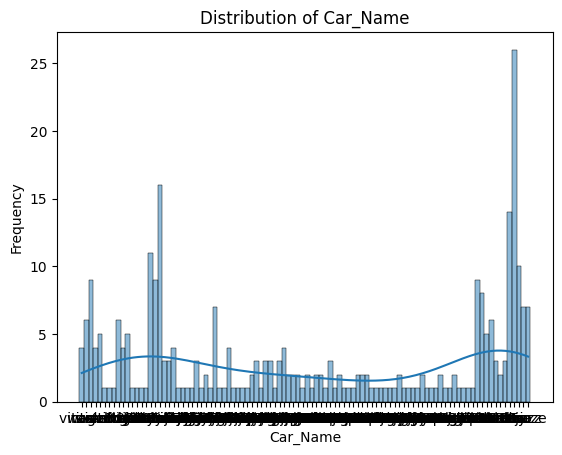

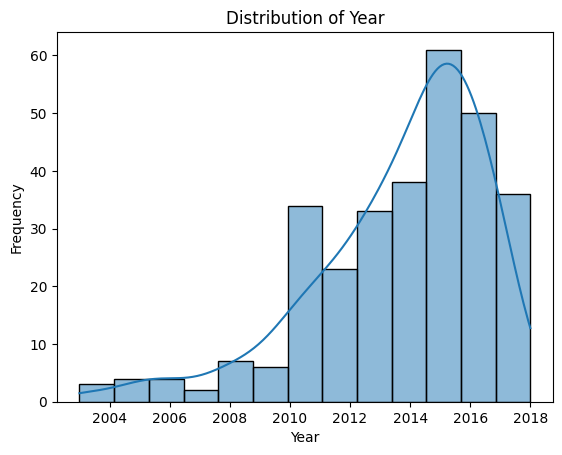

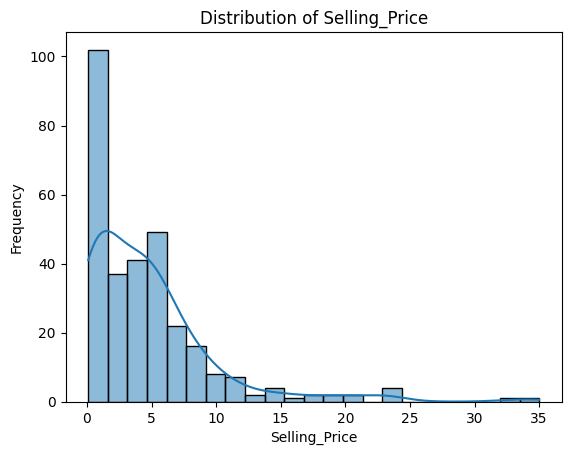

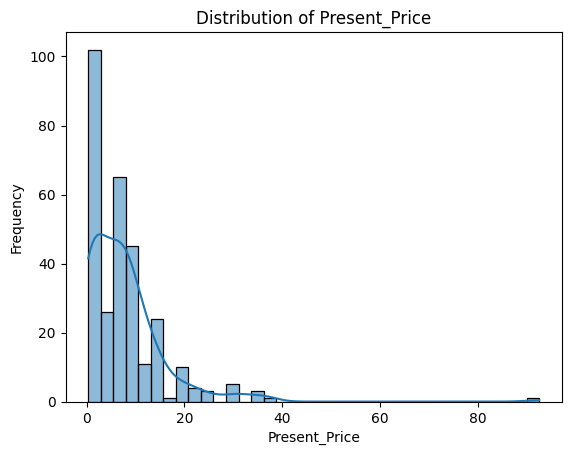

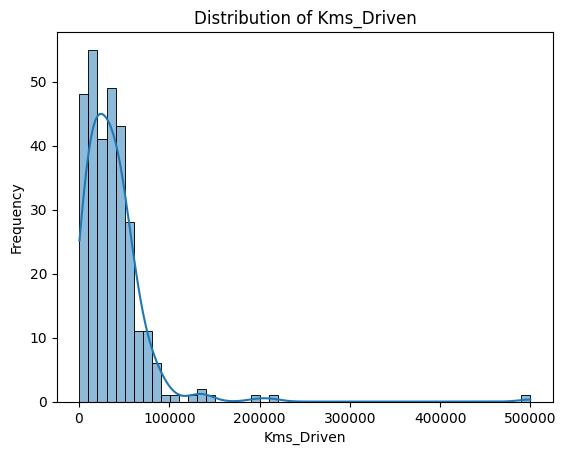

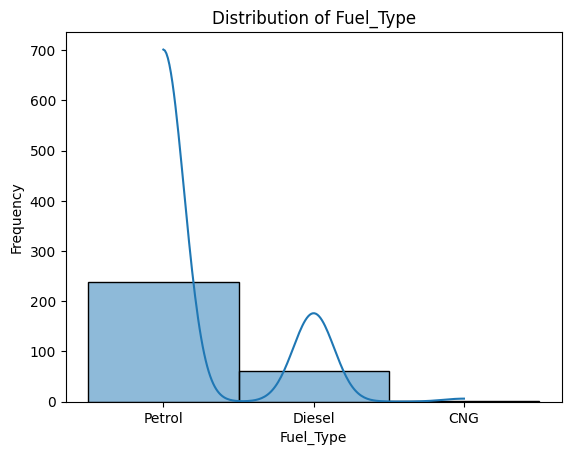

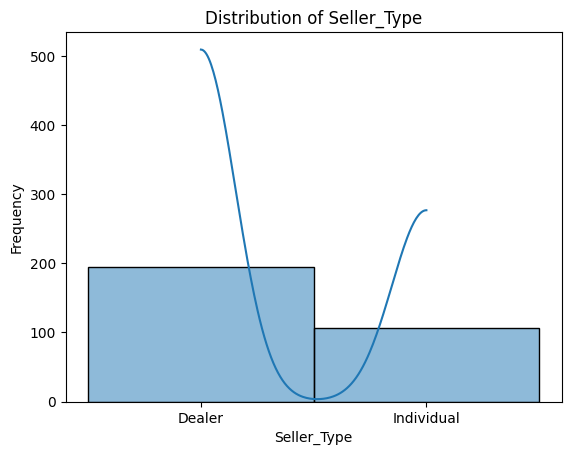

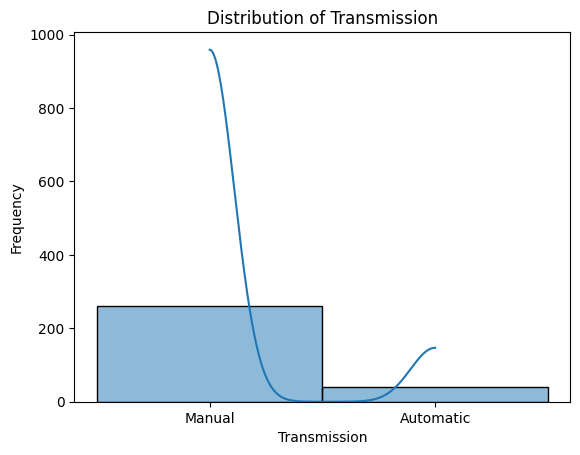

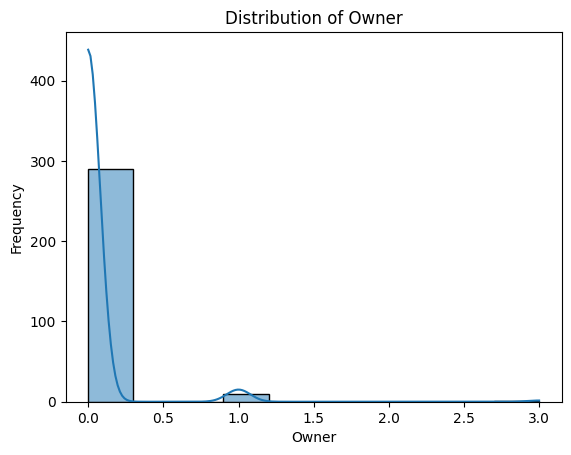

In [15]:
# Check the distribution of all the features
for column in df.columns:
    if column != 'charges':
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

### 4.1. Feature Encoding

In [19]:
# Select the encoding technique according to the input provided
if input_encoding == "LabelEncoder":
    # Use LabelEncoder function from sklearn
    le = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))

elif input_encoding == "OneHotEncoder":
    # Use pandas get dummies function to one hot encode
    df = pd.get_dummies(df, columns=categorical_columns)

elif input_encoding == "OrdinalEncoder":
    # Use OrdinalEncoder function from sklearn
    oe = OrdinalEncoder()
    df[categorical_columns] = oe.fit_transform(df[categorical_columns])
elif input_encoding == "FrequencyEncoder":
    # Frequency encode
    for variable in categorical_columns:
        # group by frequency
        fq = df.groupby(variable).size()/len(df)
        # mapping values to dataframe
        df.loc[:, "{}".format(variable)] = df[variable].map(fq)

In [20]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


### 4.2. Split X and y

In [21]:
# Split the y variable series and x variables dataset
X = df.drop([input_target_class],axis=1)
y = df[input_target_class]

### 4.3 Train - Test Split

In [22]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

### 5.1 Train Model


In [23]:
# Select the algorithm according to the input provided

model = RandomForestRegressor()

In [24]:
# Training the model:
model.fit(X_train, y_train)

model

RandomForestRegressor()

### 5.2 Model Predictions

In [25]:
# Predict class for test dataset
y_pred = model.predict(X_test)

print("Y predicted : ",y_pred)

Y predicted :  [11.0596   0.9212   6.6098  13.3195  27.0206   6.8018   6.4877   0.62076
  8.6451   9.3275   4.9274   0.9042   6.7033  10.0195  10.6118  27.1213
 10.2324   7.2601   0.53796  2.0298   9.8886   6.509    9.6972  14.2499
  0.68195  0.8497   0.66564  0.9119   0.97026 11.629    7.9091  14.6305
  0.96546 12.6576   8.7928   1.6198   8.5745   7.2238   0.66166 15.5853
 10.5207  32.1158   7.0287   7.2995   8.6022  14.9047   0.532    1.4575
 10.7403   9.3845  14.5039   4.682    9.2704  30.3529   1.5872   1.5184
  1.037    5.0358   7.3529   2.1294   8.8061  12.1508   4.6079  51.2106
  6.6178   7.6243  13.8199  10.7954   0.507    5.565    3.6552   5.1897
  0.63536 10.3493   0.5374   8.4675   0.9635  13.104    0.59748  7.1018
  0.62532 22.5252   6.3029   8.4023  10.1821   1.5346   9.3523  13.5425
  0.99812  6.3021   0.9129 ]


### 5.3. Model Evaluation


In [26]:
# Calculate RMSE
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 2.4653719344546574


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

### 6.1. Hyperparameter Tuning

In [27]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [28]:
# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]
                           }

In [29]:
# Run grid search
grid = GridSearchCV(RandomForestRegressor(), param_grid_random_forest, refit=True, verbose=3, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [30]:
# Prediction using best parameters
y_pred = grid.predict(X_test)

print("Y predicted : ",y_pred)


Y predicted :  [10.8884   0.94144  6.7494  13.4401  25.7145   6.6485   6.3765   0.67398
  8.8961   9.0684   5.0738   0.8995   6.7651   9.9053  10.5712  25.4537
  9.5745   7.1686   0.5627   2.0054  10.5286   6.5362   9.243   14.1106
  0.67962  0.836    0.66239  0.91968  0.9726  12.0557   7.8812  13.8802
  0.96986 12.7898   8.5469   1.5862   8.5664   7.1703   0.64958 14.781
 10.4717  31.9469   6.8488   7.0628   8.6375  14.6033   0.5305   1.4894
 10.5237   9.4191  13.3425   4.5298   9.2604  30.2323   1.5592   1.567
  1.0393   5.1008   7.8669   2.1168   8.8904  11.4299   4.5914  57.0068
  6.7272   7.4552  13.7235  11.0126   0.4838   5.5108   3.7699   5.081
  0.67616 10.9011   0.55668  8.4893   0.96526 13.132    0.58088  7.0684
  0.67644 25.0413   6.383    8.2638  10.3918   1.5783   9.4666  13.8934
  1.00428  6.3816   0.9254 ]


In [31]:
# Calculate RMSE
rf_rmse = mean_squared_error(y_test, y_pred)
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 8.159975497262652


### 6.2. Save the final model

In [32]:
# Save the best model to disk
with open('model.pkl', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)